# CS 416 - Algorithms for Machine Learning: Fall 2018
## Assignment 02: Denoising Autoencoder

**Tasks**
- Load the MNIST data.
- Design a convolution autoencoder for denoising with at least 2‐encoder and 2‐decoder layers.
- Add Noise to each input batch during training (function torch.rand() my be helpful).
- Report the loss after each epoch.
- Select randomly 10 images from the test set. Add noise to it and run it on the trained network.
Plot the images before noise addition, after the noise addition and the output images from the
network. The grading of the code will be based on how well the noise has been removed from
the images.

- **Please report the results with following hyperparameters.**
- Play with different configuration of convolution autoencoders.
- Try different learning rate 0.00001, 0.0001, 0.001, 0.01, 0.1.
- Try different number of epochs 10, 100, 500, 1000.
- Try batch sizes of 16, 32, 64, 128.

# Installing Dependencies

In [0]:
!pip install torch==0.4.0
!pip install torchvision

# Importing Modules

In [0]:
# For model training
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.datasets as dataset
from torch.autograd import Variable
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim

# For visualisation
import matplotlib.pyplot as plt

# For array operations
import numpy as np

# Global Variables

In [0]:
batch_size = 32
epochs = 10
learning_rate = 0.5

# Loading Data

In [0]:
# Forming tensors
transforms = transforms.Compose([transforms.ToTensor()])

# Selecting train and test dataset
train_set = dataset.MNIST(root='./data', train=True, download=True, transform=transforms)
test_set = dataset.MNIST(root='./data', train=False, download=True, transform=transforms)

# Loading train and test dataset
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True, num_workers=4)

# Class: Autoencoder

In [0]:
class Autoencoder(nn.Module):
  
  # Initialising encoder and decoder layers
  def __init__(self):
    super(Autoencoder, self).__init__()
#     # 2-2 layer design
#     self.encoder1 = nn.Sequential(nn.Linear(28*28, 100), nn.ReLU())
#     self.encoder2 = nn.Sequential(nn.Linear(100, 28), nn.ReLU())
#     self.decoder1 = nn.Sequential(nn.Linear(28, 100), nn.ReLU())
#     self.decoder2 = nn.Sequential(nn.Linear(100, 28*28), nn.ReLU())

#     # 3-3 layer design
#     self.encoder1 = nn.Sequential(nn.Linear(28*28, 100), nn.ReLU())
#     self.encoder2 = nn.Sequential(nn.Linear(100, 50), nn.ReLU())
#     self.encoder3 = nn.Sequential(nn.Linear(50, 28), nn.ReLU())
#     self.decoder1 = nn.Sequential(nn.Linear(28, 50), nn.ReLU())
#     self.decoder2 = nn.Sequential(nn.Linear(50, 100), nn.ReLU())
#     self.decoder3 = nn.Sequential(nn.Linear(100, 28*28), nn.ReLU())

    # 4-4 layer design
    self.encoder1 = nn.Sequential(nn.Linear(28*28, 100), nn.ReLU())
    self.encoder2 = nn.Sequential(nn.Linear(100, 50), nn.ReLU())
    self.encoder3 = nn.Sequential(nn.Linear(50, 25), nn.ReLU())
    self.encoder4 = nn.Sequential(nn.Linear(25, 12), nn.ReLU())
    self.decoder1 = nn.Sequential(nn.Linear(12, 25), nn.ReLU())
    self.decoder2 = nn.Sequential(nn.Linear(25, 50), nn.ReLU())
    self.decoder3 = nn.Sequential(nn.Linear(50, 100), nn.ReLU())
    self.decoder4 = nn.Sequential(nn.Linear(100, 28*28), nn.ReLU())
    
  # Declaring the forward pass
  def forward(self, x):
#     # 2-2 layer design
#     x = self.encoder1(x)
#     x = self.encoder2(x)
#     x = self.decoder1(x)
#     x = self.decoder2(x)
    
#     # 3-3 layer design
#     x = self.encoder1(x)
#     x = self.encoder2(x)
#     x = self.encoder3(x)
#     x = self.decoder1(x)
#     x = self.decoder2(x)
#     x = self.decoder3(x)

    # 4-4 layer design
    x = self.encoder1(x)
    x = self.encoder2(x)
    x = self.encoder3(x)
    x = self.encoder4(x)
    x = self.decoder1(x)
    x = self.decoder2(x)
    x = self.decoder3(x)
    x = self.decoder4(x)
    return x

# Initialising the Model

In [0]:
model = Autoencoder()

# Defining Optimization Technique

In [0]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Generating Artificial Noise

In [16]:
noise_data = torch.rand([batch_size, 28*28])
noise_data.size()

torch.Size([32, 784])

In [17]:
dataIter = iter(train_loader)
image, _ = dataIter.next()

inputs = image.view(image.size(0), -1)
inputs.size()

torch.Size([32, 784])

# Model Training

In [18]:
dataIter = iter(train_loader)
image, _ = dataIter.next()
# noisy_inputs = noise_data

for epoch in range(epochs):
  running_loss = 0
  for data in train_loader:
    image, _ = data
    inputs = image.view(image.size(0), -1)
    noisy_inputs = inputs + noise_data
    optimizer.zero_grad()
    outputs = model(noisy_inputs)
    loss = criterion(outputs, inputs)
    loss.backward()
    optimizer.step()
    running_loss += loss.data[0]
  print("Epoch : %d ; MSE : %f"%(epoch+1, running_loss/(train_set.train_data.size(0)/batch_size)))
print("Finished Training")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


Epoch : 1 ; MSE : 0.076651
Epoch : 2 ; MSE : 0.052876
Epoch : 3 ; MSE : 0.039821
Epoch : 4 ; MSE : 0.032774
Epoch : 5 ; MSE : 0.029666
Epoch : 6 ; MSE : 0.027556
Epoch : 7 ; MSE : 0.026425
Epoch : 8 ; MSE : 0.025673
Epoch : 9 ; MSE : 0.025157
Epoch : 10 ; MSE : 0.024485
Finished Training


# Model Testing and Visualization

In [0]:
dataIter=iter(test_loader)
test_image, _ = dataIter.next()
input_image = test_image.view(image.size(0), -1)
original_image = test_image.view(-1, 28, 28)

# Adding artificial noise to test batch
noisy_image = input_image + noise_data
output_image = model(noisy_image)
output_image=output_image.view(-1, 28, 28)
noisy_image = noisy_image.view(-1, 28, 28)

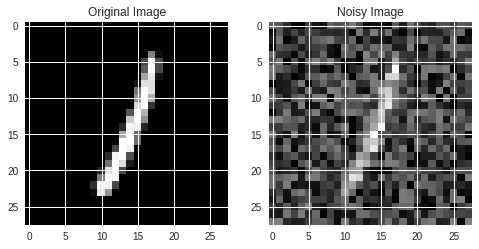

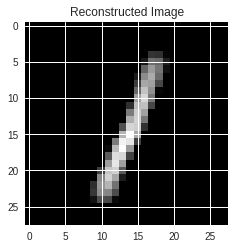

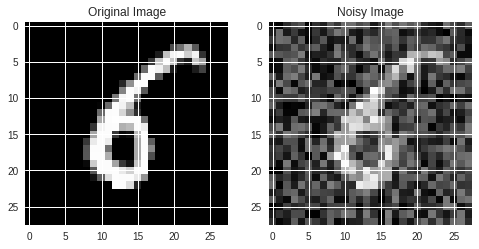

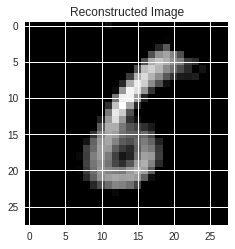

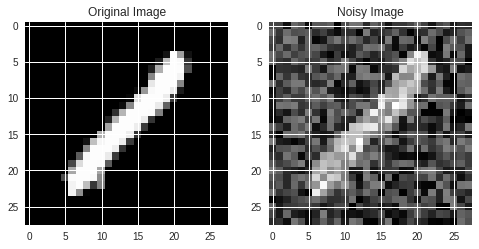

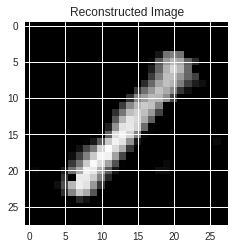

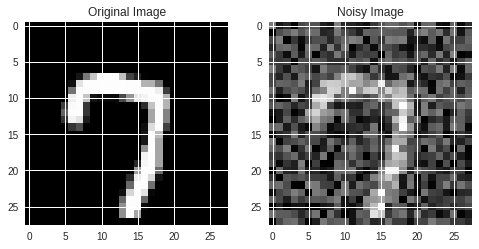

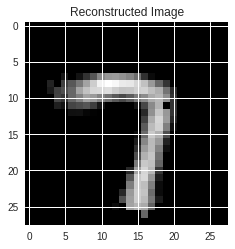

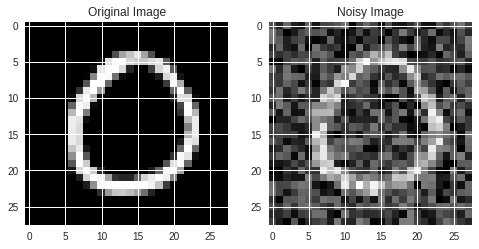

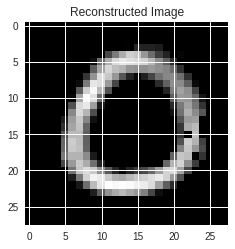

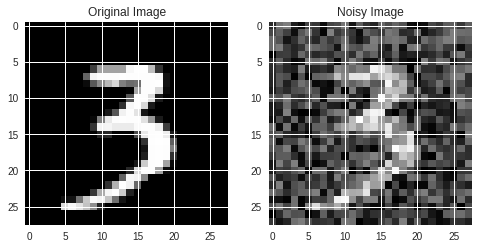

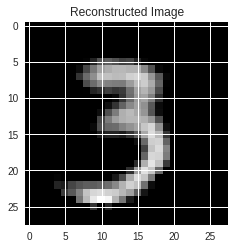

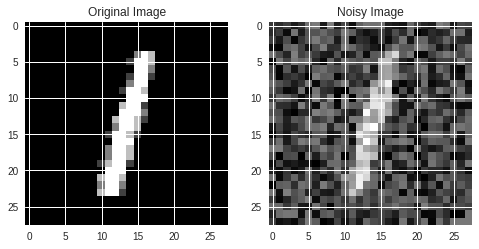

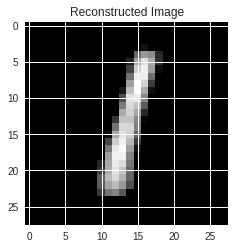

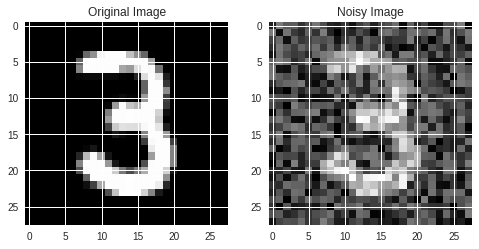

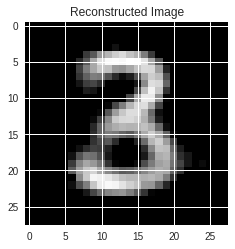

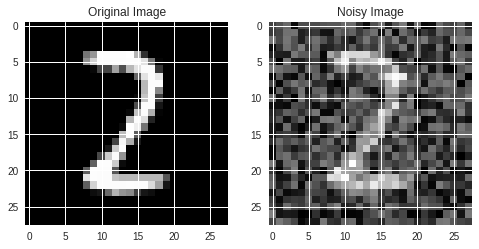

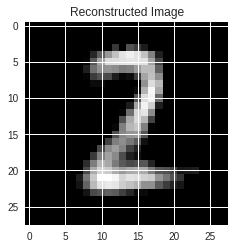

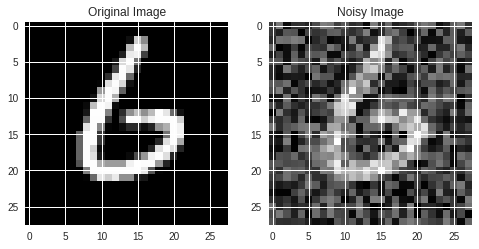

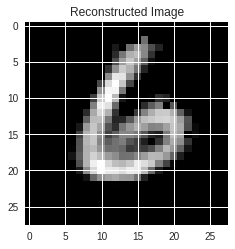

In [20]:
for i in range(10):
  fig = plt.figure()
  # Original image
  plot = fig.add_subplot(1, 2, 1)
  img = np.array(original_image[i])
  plot.set_title('Original Image')
  plt.imshow(img, cmap='gray')

  # Noisy image
  plot = fig.add_subplot(1, 2, 2)
  img = np.array(noisy_image[i])
  plot.set_title('Noisy Image')
  plt.imshow(img, cmap='gray')

  # Reconstructed image
  fig = plt.figure()
  plot = fig.add_subplot(1, 2, 1)
  img = output_image.data
  plot.set_title('Reconstructed Image')
  plt.imshow(img[i].numpy(), cmap='gray')
  
plt.show()

# Analysis Report

This portion reports the performance of autoencoder after trying it with different architecture design and algorithm parameters. Below is the list of different autoencoder architectures tried with the above mentioned groups of parameter values:

### 1. 2-2 Layer Design:
This design has 2 encoder as well as 2 decoder layers.
The analysis is as follows:

**Batch-size = 1000**;
**Epochs = 10**;
**LR = 0.1**: 
*Very bad*

**Batch-size = 32**;
**Epochs = 10**;
**LR = 0.01**: 
*Bad*

**Batch-size = 32**;
**Epochs = 10**;
**LR = 0.0001**: 
*Very Bad*

**Batch-size = 64**;
**Epochs = 100**;
**LR = 0.001**: 
*Bad*

**Batch-size = 1000**;
**Epochs = 100**;
**LR = 0.1**: 
*Good*

### 2. 3-3 Layer Design:
This design has 3 encoder as well as 3 decoder layers.
The analysis is as follows:

**Batch-size = 32**;
**Epochs = 10**;
**LR = 0.5**: 
*Very good*

### 3. 4-4 Layer Design:
This design has 4 encoder as well as 4 decoder layers.
The analysis is as follows:

**Batch-size = 32**;
**Epochs = 10**;
**LR = 0.5**: 
*Very good*

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

Upon the analysis of autoencoders on different architectures and parameter values, it is observed that the network performes better as the layers are increased. Moreover, sufficiently larger values of epochs does not effect the learning rate on a wide scale as the error is reduced on a very tiny scale after 50 epochs. After analysis, it is seen that 0.1 - 0.5 is the best learning rate for given autoencoder and batch size doesn't really make a difference.